<a href="https://colab.research.google.com/github/NIETOCAMBRON7/Simulacion-2/blob/main/Exmen/Ejercicio1_Ex%C3%A1men.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno: Nieto Cambrón Daniel Alejandro
## Boleta: 2015030917
## Fecha: 07 de mayo de 2023
### Primer Examen parcial: Simulación 1

#<font color='blue'>Ejercicio 1</font>

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10.

### a) Resolver por simulación

Podemos simular este problema generando dos números aleatorios entre 0 y 30 que representen los tiempos de llegada de las dos personas. Luego, podemos calcular la diferencia entre los tiempos de llegada y determinar si es menor o igual a 10. 

Este código genera un millón de simulaciones y cuenta el número de veces que la diferencia de tiempo es menor o igual a 10. Luego, divide el número de éxitos por el número total de simulaciones para obtener una estimación de la probabilidad. La salida del código puede variar un poco cada vez que se ejecuta.

NOTA: La función **random.uniform()** se utiliza en el ejemplo para generar dos números aleatorios de punto flotante en el intervalo [0, 30] que representan los tiempos de llegada de las dos personas en el problema. Esto es porque la distribución de probabilidades de llegada de las personas en el intervalo [0, 30] se supone que es continua y uniforme, es decir, todas las llegadas son igualmente probables.

In [ ]:
import random
import matplotlib.pyplot as plt

num_simulaciones = 1000000
num_exitos = 0
t1_list = []  # lista para almacenar los valores de t1 generados
t2_list = []  # lista para almacenar los valores de t2 generados

for i in range(num_simulaciones):
    t1 = random.uniform(0, 30)
    t2 = random.uniform(0, 30)
    t1_list.append(t1)  # añadir t1 a la lista
    t2_list.append(t2)  # añadir t2 a la lista
    if abs(t2 - t1) <= 10:
        num_exitos += 1

probabilidad = num_exitos / num_simulaciones

print("La probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 es: ", probabilidad)
print()


La probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 es:  0.555861



Como extra, se verificara que nuestros tiempos tomados, sigan una distribucion uniforme, es por ello que en el codigo anterior se decidio guardar los tiempos de llegada en dos listas, una para el tiempo de llegada de la persona 1 y la otra para los tiempos de llegada de la persona 2

 Mostrando los datos en un histograma como se muestra a continuacion:

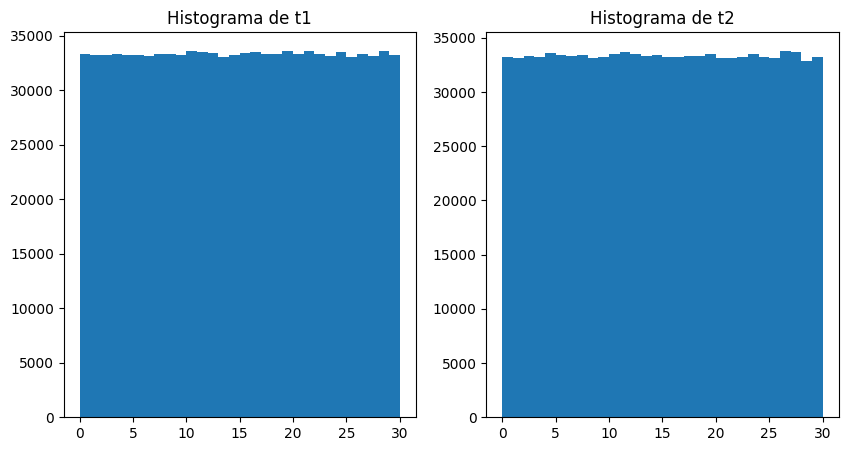

In [ ]:
# crear histogramas de t1 y t2
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(t1_list, bins=30)
axs[0].set_title("Histograma de t1")
axs[1].hist(t2_list, bins=30)
axs[1].set_title("Histograma de t2")
plt.show()


### b) Resolver Analíticamente

Sea $X$ la variable aleatoria que representa el tiempo de llegada de la primera persona, y sea $Y$ la variable aleatoria que representa el tiempo de llegada de la segunda persona. Como se supone que las llegadas son independientes y uniformemente distribuidas en el intervalo $[0,30]$, tenemos que:



$$f_X(x) = \begin{cases}
\frac{1}{30} & 0 \leq x \leq 30 \\
0 & \text{en otro caso}
\end{cases}$$


y ademas:


$$f_Y(y) = \begin{cases}
\frac{1}{30} & 0 \leq y \leq 30 \\
0 & \text{en otro caso}
\end{cases}$$ 


Para calcular la probabilidad de que el tiempo que una persona espere a la otra sea como máximo de 10 minutos, necesitamos encontrar la probabilidad de que $|X-Y| \leq 10$. Podemos hacer esto integrando la función conjunta de densidad de probabilidad de $X$ y $Y$ sobre la región en el plano $xy$ donde se cumple esta condición. Es decir:


$$P(|X-Y| \leq 10) = \iint_{|x-y|\leq10} f_{X,Y}(x,y) \, dx\, dy$$


donde $f_{X,Y}(x,y)$ es la función conjunta de densidad de probabilidad de $X$ y $Y$.

Como $X$, $Y$ son independientes, la función conjunta de densidad de probabilidad de $X$,$Y$ es simplemente el producto de sus funciones de densidad de probabilidad individuales. Por lo tanto:


$$f_{X,Y}(x,y) = f_X(x) \cdot f_Y(y) = \frac{1}{30^2} \qquad 0 \leq x,y \leq 30$$


Entonces, podemos integrar esta función sobre la región en el plano $xy$ donde se cumple la condición $|x-y|\leq 10$:

Para poder entender esta parte, Realizamos un grafico que nos muestra nuestra condicion.

La gráfica representa la región donde se cumple la condición de que el tiempo que una persona espera a la otra sea como máximo de 10 minutos. En el eje horizontal se encuentra el tiempo de llegada de la primera persona, mientras que en el eje vertical se encuentra el tiempo de llegada de la segunda persona.

La línea roja representa la recta $y=x+10$, y la línea verde representa la recta $y=x-10$. La región sombreada corresponde a la región donde se cumple la condición $|X-Y| \leq 10$, es decir, la región donde la diferencia entre los tiempos de llegada de ambas personas es menor o igual a 10 minutos.

En otras palabras, si la primera persona llega en un tiempo $x$ y la segunda persona llega en un tiempo $y$, entonces la diferencia entre estos tiempos es $|X-Y|$. La región sombreada representa todos los puntos $(x,y)$ en los que $|X-Y|\leq10$, lo que significa que si ambas personas llegan en tiempos dentro de esta región, entonces la persona que llegue primero no tendrá que esperar a la otra por más de 10 minutos.

La región sombreada está limitada por las rectas $y=x+10$ y $y=x-10$. Cualquier punto por encima de la recta $y=x+10$ violaría la condición $|X-Y| \leq 10$, ya que en este caso la diferencia entre los tiempos de llegada sería mayor a 10 minutos. De manera similar, cualquier punto por debajo de la recta $y=x-10$ también violaría la condición. Por lo tanto, la región sombreada se encuentra entre estas dos rectas.

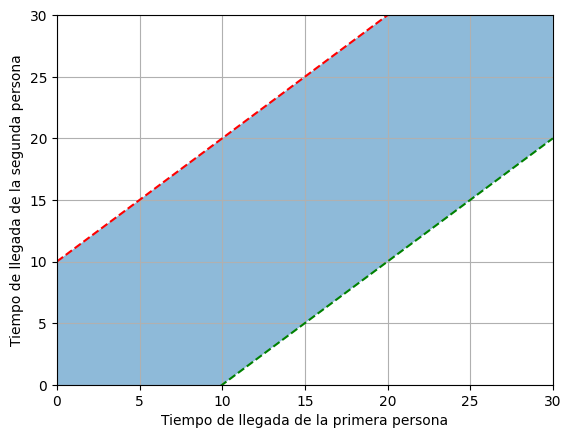

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 30, 1000)   # Genera un arreglo de 1000 puntos equidistantes entre 0 y 30
y1 = x + 10   # Ecuación de la recta y = x + 10
y2 = x - 10   # Ecuación de la recta y = x - 10

# Crea la figura y los ejes
fig, ax = plt.subplots()

# Grafica la región
ax.fill_between(x, y1, y2, where=(y1>=y2), alpha=0.5)

# Agrega las líneas rojas y verdes para establecer los limites visuales de las rectas dadas
ax.plot(x, y1, 'r--')
ax.plot(x, y2, 'g--')

# Ajusta los límites de los ejes y los ticks
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.set_xticks(np.arange(0, 31, 5))
ax.set_yticks(np.arange(0, 31, 5))

# Agrega la cuadrícula en los ejes
ax.grid(True)

# Etiqueta los ejes
ax.set_xlabel('Tiempo de llegada de la primera persona')
ax.set_ylabel('Tiempo de llegada de la segunda persona')

# Muestra la figura
plt.show()


Ahora bien debemos de considerar la siguiente:

<font color='red'>NOTA: Es importante notar que la integral se debe resolver, respetando los limites marcados por esta figura, más aún, que $0 \leq x,y \leq 30$, ya que si no lo tomamos en consideracion, las rectas $y = x+10$, $y = x-10$, tienen dominio en todos los Reales, por lo que nuestro resultado sera erroneo, en caso de no considerarse. Un ejemplo claro de esto, podemos notarlo en la siguiente imagen: </font>

[![Fig.1](https://cvws.icloud-content.com/B/AdaIjYBIZ09L2q36igrmtKxN6_wMAf5Vpjkd3t3js0S9YoxvJaMWzmiL/MATLAB1.png?o=AgTG14qE-2_iACqlUKjjIViIIQ2ragwsVt2GBtdn2U_8&v=1&x=3&a=CAogESvcLmvy7QlepwNGqyD2zZ1BbpkVcA4Wll8zGge9GDISbxDh4tin_zAY4b-0qf8wIgEAUgRN6_wMWgQWzmiLaifhT2V_eUCb3eTNBzKgOXq2vLO_k7B3dbkA02kB4I3EeR5OrGBXA6VyJ4FIAW_iJ0v8obfJJ5M8oYPwytN7_STR_GHtpxJksTT0d_giKgPfOg&e=1683445587&fl=&r=3b167ec5-fadb-49f9-a47e-56aad382c5f7-1&k=ibD1Skmsp3z2ByldUyK2yg&ckc=com.apple.clouddocs&ckz=com.apple.CloudDocs&p=137&s=VKY3HOjdSZv4D6t3dO7PhGlgJpo&cd=i)](https://drive.google.com/file/d/1FcX4L_jPA7o8pC-dWIZw6C8OOA_y8xbZ/view?usp=share_link)

[Link](https://drive.google.com/file/d/1FcX4L_jPA7o8pC-dWIZw6C8OOA_y8xbZ/view?usp=share_link").

<font color='red'>donde notemos que el eje $x$ respeta el intervalo dado por $0 \leq x \leq 30$, mientras que el eje $y$ no lo respeta pues tambien sigue que: $0 \leq y \leq 30$ y en la imagen se muestra con $-10 \leq y \leq 40$, lo que hace que nuestro calculo tenga errores, y esto se debe a que las lineas de frontera dadas por $y = x \pm 10$ esta definida de $-∞$ a $+\infty$, por lo que se recalca, que debemos considerar correctamente las fronteras y limites de integración </font>

Siguiendo, tenemos que:


$$P(|X-Y| \leq 10) = \iint_{|x-y|\leq10} f_{X,Y}(x,y) \, dx\, dy$$

así, basta calcular:

$$\iint_{|x-y|\leq10} f_{X,Y}(x,y) \, dx\, dy $$ 

considerando: $0 \leq x,y \leq 30$


$$= \int_{0}^{10}\int_{0}^{x+10} f_{X,Y}(x,y) \, dy\, dx  +  \int_{10}^{20}\int_{x-10}^{x+10} f_{X,Y}(x,y) \, dy\, dx  + \int_{20}^{30}\int_{x-10}^{30} f_{X,Y}(x,y) \, dy\, dx$$


$$ = \int_{0}^{10}\int_{0}^{x+10} \frac{1}{30^2} \, dy\, dx  +  \int_{10}^{20}\int_{x-10}^{x+10} \frac{1}{30^2} \, dy\, dx  + \int_{20}^{30}\int_{x-10}^{30} \frac{1}{30^2} \, dy\, dx  $$

$$ = \frac{1}{30^2}    \left[\int_{0}^{10}\int_{0}^{x+10}  \, dy\, dx  +  \int_{10}^{20}\int_{x-10}^{x+10}  \, dy\, dx  + \int_{20}^{30}\int_{x-10}^{30}  \, dy\, dx\right]$$



La integral representa la probabilidad de que la diferencia absoluta entre $X$ y $Y$ sea menor o igual a 10. Primero, se establece la región de integración que satisface esta condición. Observando la desigualdad $|X-Y|\leq 10$, se puede notar que es equivalente a $-10 \leq X-Y \leq 10$ o $Y-10 \leq X \leq Y+10$ y $X-10 \leq Y \leq X+10$. Esta región se puede visualizar como un rectángulo de base 20 y altura 20 con dos triángulos rectángulos de lados 10 en cada esquina que se superponen.

La integral doble se utiliza para sumar las contribuciones de la densidad de probabilidad en toda la región de interés. La función de densidad conjunta es $f_{X,Y}(x,y) = \frac{1}{30^2}$ para $(x,y)$ en la región rectangular $0\leq x,y\leq 30$. Dado que la función de densidad es constante, la integral doble se reduce a multiplicar el área de la región por el valor de la densidad en cualquier punto dentro de ella. En este caso, la región blanca es basicamente un cuadrado de base 20 y altura 20, por lo que su área es $20\times 20 = 400$. Mientras que la region sobrante tiene un area de $900 - 400 = 500$ correspondiente al Area sombreada azul, 

Entonces, la probabilidad se puede calcular como ya se menciono:


$$P(|X-Y| \leq 10) = \frac{1}{30^2} \left[\int_{0}^{10}\int_{0}^{x+10}  \, dy\, dx  +  \int_{10}^{20}\int_{x-10}^{x+10}  \, dy\, dx  + \int_{20}^{30}\int_{x-10}^{30}  \, dy\, dx\right] $$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import dblquad

# Define la función a integrar en la región
def integrand(x, y):
    return 1/(30**2)

# Define los límites de integración para la región
def limits_x():
    return [0, 10], [10, 20], [20, 30]

def limits_y(x):
    if x < 10:
        return [0, x+10]
    elif x < 20:
        return [x-10, x+10]
    else:
        return [x-10, 30]

# Calcular las integrales dobles
VALOR_I, _ = dblquad(integrand, 0, 30, lambda x: limits_y(x)[0], lambda x: limits_y(x)[1])

# El valor de la integral dada, se imprime
print('El valor de la integral dada es: :', VALOR_I)



El valor de la integral dada es: : 0.5555555555555555


Como se observa, la integral da como valor, la siguiente probabilidad:
$$P(|X-Y| \leq 10) = \frac{500}{900} = \frac{5}{9} = 0.5555$$
Por lo tanto, la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos es $\frac{5}{9} = 0.5555$.

Lo cual coincide con el ejercicio resuelto por simulación, en el inciso anterior.

Por otro lado, podemos hacer el ejercicio aún más simple; si simplemente consideramos visualmente el area marcada en la figura anterior, tenemos que el area completa es de $30 \times 30 = 900$ y el area de los dos triangulos blancos que estan esquinados, como ya se dijo tiene un area de $400$, por lo que restando $900-400 = 500 $, lo que corresponde al area delimitada por las rectas roja y verde, por lo tanto, si decimos que todo el margen de  $30 \times 30 = 900$ tiene una probabilidad de 1, entonces, para calcular la probabilidad que le corresponde al area azul, basta con decir:

$$ P = \frac{500}{900} = 0.555 $$

Lo cual coincide con el ejercicio resuelto por simulación y de manera analitica, que se mostraron con anterioridad... $qed$